In [2]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
import numpy as np
tt=[]  #Split the MWA data
with open('1130781304_run2_catalog.txt') as infile:
    for line in infile:
        tt.append(line.split(','))
ttgl=[] #Split the Gleam data        
with open('GLEAM.txt') as infile:
    for line in infile:
        ttgl.append(line.split(',')) 
del tt[0]      #Delete the fist element in the list as it is string (MWA)
tt_float=[]    #Convert string to float MWA
for i in tt: 
    i_float1=[float(z) for z in i]
    tt_float.append(i_float1)
del ttgl[0]  #Delete the first element list as it is string (Gleam)
ttgl_float=[] #change string to float Gleam
for k in ttgl:  
    k_float=[float(m) for m in k]
    ttgl_float.append(k_float)
Flux_T=[]   # Flux for all the MWA sources
Flux_Tc=[]  #Flux for compact MWA sources
Flux_Tex=[] #Fluxlux for extended MWA sources
Flux_Tgl=[] #Flux for GLEAM sources
Rac=[]      #Ra for compact MWA sources
Decc=[]     #Dec for compact MWA sources
Ragl=[]     #Ra Gleam
Decgl=[]    #Dec Gleam
for j in tt_float:
    if j[3]==1:
            Flux_T1=j[2]
            Flux_T.append(Flux_T1)
            Flux_Tex.append(Flux_T1)                     
    else: 
            Flux_T2=j[2]
            Flux_T.append(Flux_T2)
            Flux_Tc.append(Flux_T2)
            Decc1=j[1] 
            Decc.append(Decc1)
            Rac1=j[0]
            Rac.append(Rac1) 
for i in ttgl_float:
    Flux_Tgl1=i[2]
    Flux_Tgl.append(Flux_Tgl1)
    Decgl1=i[1]
    Decgl.append(Decgl1)
    Ragl1=i[0]
    Ragl.append(Ragl1)
print 'min', 'Rac',min(Rac),'Decc', min(Decc)
print  'max', 'Rac', max(Rac),'Decc', max(Decc)

min Rac 18.3658 Decc -64.5804
max Rac 75.5605 Decc -28.2583


In [3]:
#GLEAM sources with in the max and min RAc and Decc.
De11=[]
Ra11=[]
Flux11=[]
Ra=[]
De=[]
Flux=[]
count=0
while count <len(Decgl):
    if -64<Decgl[count]<-29:
       De11.append(Decgl[count])
       Ra11.append(Ragl[count])
       Flux11.append(Flux_Tgl[count])
       count=count+1
    else:
        count=count+1
count=0
while count <len(Ra11):
    if 17<Ra11[count]<77:
       De.append(De11[count])
       Ra.append(Ra11[count])
       Flux.append(Flux11[count])
       count=count+1
    else:
        count=count+1    
#MWA sources with Flux >10jy
count=0
Flux_1jy=[]
De_1jy=[]
Ra_1jy=[]
De_all=[]
while count < len(Flux_Tc):
    if Flux_Tc[count]>=10:
       Flux_1jy.append(Flux_Tc[count])
       De_1jy.append(Decc[count])
       Ra_1jy.append(Rac[count])
       count=count+1
    else:
       count=count+1
#Matching MWA sources with GLEAM sources.
Ang_dis=[]        #Angular distance between MWA sources and Gleam sources
Ang_dis_2am=[]    #Angular distance between MWA sources and Gleam sources within 2 arc min radius of the MWA sources.
ri_list=[]        #Indices for matching MWA and Gleam sources
for i in De_1jy:       
    ri=[De_1jy.index(i)]
    count=0
    while count< len(De):
        a=(math.sin(np.radians(i)))*(math.sin(np.radians(De[count])))
        b=(math.cos(np.radians(i)))*(math.cos(np.radians(De[count])))*(math.cos(np.radians(Ra_1jy[De_1jy.index(i)]-Ra[count])))             
        ang_d=np.degrees(math.acos(a+b))
        if ang_d < 0.0333333:          
            ri.append(count)
            Ang_dis_2am.append(ang_d)
            count=count+1
            
        else:
            count=count+1
        Ang_dis.append(ang_d)
    ri_list.append(ri)
print len(Flux_1jy), len(Ra_1jy), len(De_1jy)

127 127 127


In [5]:
#Ang_dis_all=[]
#ri_list_all=[]
#for i in De_all:       
#    ri_all=[De_all.index(i)]
#    count=0
#    while count< len(De):
#       a=(math.sin(np.radians(i)))*(math.sin(np.radians(De[count])))
#       b=(math.cos(np.radians(i)))*(math.cos(np.radians(De[count])))*(math.cos(np.radians(Ra_all[De_all.index(i)]-Ra[count])))             
#       ang_d=np.degrees(math.acos(a+b))
#       if ang_d < 0.0333333:          
#           ri_all.append(count)
#           count=count+1
#       else:
#           count=count+1
#       Ang_dis_all.append(ang_d)
#   ri_list_all.append(ri)    


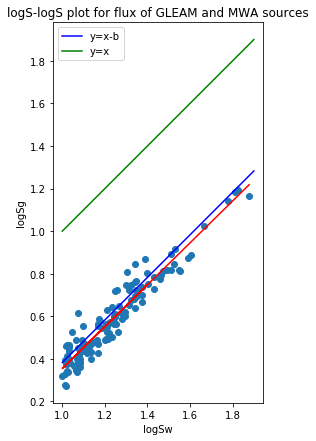

In [76]:
r_1to1=[]    #Indices for One to one match
r_no=[]      #No match
r_many=[]    #One to many match
Ra_2amw=[]   #Ra MWA 2arc min rad.
De_2amw=[]   #De MWA 2arc min rad.
Ra_2amg=[]   #Ra GLEAM 2arc min rad.
De_2amg=[]   #De GLEAM 2arc min rad.
for i in ri_list:
      if len(i)==1:
            r_no.append(i)
      elif len(i)==2:
            r_1to1.append(i)
            Ra_2amw.append(Ra_1jy[i[0]])
            Ra_2amg.append(Ra[i[1]])
            De_2amw.append(De_1jy[i[0]])
            De_2amg.append(De[i[1]])
      else:
            r_many.append(i)      
f1=[] #Flux MWA
f2=[] #Flux GLEAM
for i in r_1to1:
    f1.append(Flux_1jy[i[0]])
    f2.append(Flux[i[1]])
# log_S_GLEAM vs log_S_MWA
pl.figure(figsize=(7,7))
fit = np.polyfit(np.log10(f1),np.log10(f2),1)
fit_fn = np.poly1d(fit) 
pl.plot(np.log10(f1), np.log10(f2),'o')
pl.plot(np.log10(f1),np.polyval(fit,np.log10(f1)),'r-')
pl.xlabel('logSw')
pl.ylabel('logSg')
x=np.arange(1,2,0.1)
y=x-0.6173747
pl.plot(x,y,'b-',label='y=x-b')
pl.plot(x,x,'g-',label='y=x')
pl.legend()
pl.title('logS-logS plot for flux of GLEAM and MWA sources')
pl.gca().set_aspect('equal',adjustable='box')
#pl.plot(np.log10(Flux_G2AM), np.log10(Flux_W2AM),'ro')
#pl.yscale('log')
#pl.xscale('log')
pl.show()

In [5]:
#Slope and y intercept of the fit
fit = np.polyfit(np.log10(f1),np.log10(f2),1)
print fit

[ 0.98372349 -0.62920591]


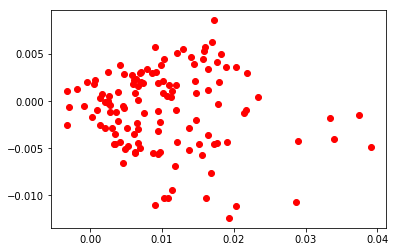

In [6]:
#Ra and Dec differences between the MWA and GLEAM sources
DRa=[i-j for i,j in zip(Ra_2amw, Ra_2amg)]
DDe=[i-j for i,j in zip(De_2amw,De_2amg)]
pl.plot(DRa,DDe,'ro')
pl.show()

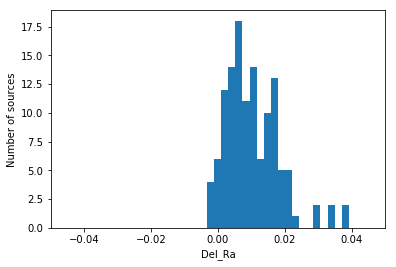

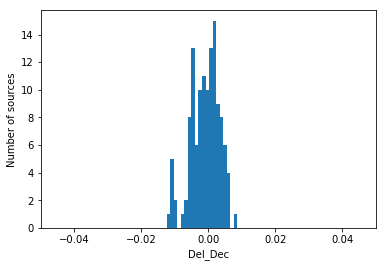

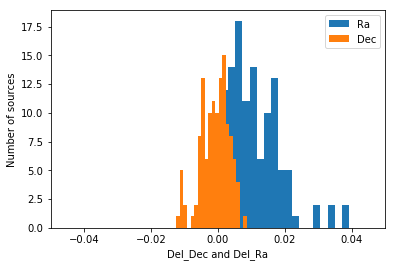

In [44]:
pl.figure()
pl.hist(DRa, histtype='bar',bins=20)
pl.xlabel('Del_Ra')
pl.ylabel('Number of sources')
pl.xlim(-0.05,0.05)
pl.show()
pl.hist(DDe, histtype='bar',bins=20)
pl.xlabel('Del_Dec')
pl.ylabel('Number of sources')
pl.xlim(-0.05,0.05)
pl.show()
pl.figure()
pl.hist(DRa, histtype='bar',bins=20,label='Ra')
pl.hist(DDe, histtype='bar',bins=20,label='Dec')
pl.legend()
#pl.legend([line_up, line_down])
#pl.legend('D')
pl.xlabel('Del_Dec and Del_Ra')
pl.xlim(-0.05,0.05)
pl.ylabel('Number of sources')
pl.show()


In [54]:
#Angular distance in arc second
As=[]
for i in Ang_dis_2am:
    b=i*3600
    As.append(b)

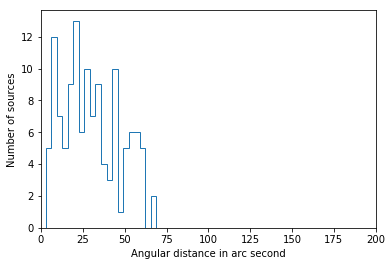

In [79]:
pl.hist(As, histtype='step', bins=20)
pl.xlabel('Angular distance in arc second')
pl.ylabel('Number of sources')
pl.xlim(0,200)
pl.show()